<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Estadistica_e_InferenciaCausal/3%20Redes%20Bayesianas/Notebooks/Red_Bayesiana_Sobrevivientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyagrum  # permite utilizar biblioteca C++ aGrUM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.5 MB/s eta 0:00:00


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
%matplotlib inline


## Modeloando las características de los sobrevivientes del Titanic

In [3]:

bn = gum.BayesNet("Sobrevivientes")
bn =gum.fastBN("Age;Gender;Relatives; Pclass; Embarked; Survived")

bn

(pyAgrum.BayesNet<double>@0x1ed3350) BN{nodes: 6, arcs: 0, domainSize: 64, dim: 6, mem: 96o}

De lo que sabemos del Titanic ¿qué modelo gráfico podríamos construir para explicar la sobrevivencia de los pasajeros?

In [4]:

bn =gum.fastBN("Age;Gender->Survived<-Pclass<-Embarked ;Relatives")

bn

(pyAgrum.BayesNet<double>@0x1ef1dc0) BN{nodes: 6, arcs: 3, domainSize: 64, dim: 10, mem: 160o}

## Modelo bayesiano que aprende de un conjunto de datos

El conjunto de datos tiene su origen en los datos ofrecidos por [Kaggle](https://www.kaggle.com/c/titanic/data). 



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

learner = gum.BNLearner('/content/drive/MyDrive/Datos/Titanic Kaggle/titanic_rb.csv')
bn = learner.learnBN()
bn

(pyAgrum.BayesNet<double>@0x1f07d80) BN{nodes: 6, arcs: 8, domainSize: 576, dim: 58, mem: 752o}

La red muestra las dependencias probabilísticas entre las variables, así como las independencias condicionales de una variable dada(s) otra(s) variable(s). 

$\mathbb{P} ( S\mid G,PC,E,A,R ) = \mathbb{P}( S\mid G,PC)$

$\mathbb{P} ( G\mid PC,E, A,R ) = \mathbb{P}( G\mid E,R)$

In [7]:
print(bn.variable("Age"))

Age:Labelized({adult|baby|kid|old|teen|toddler})


### Exploración de datos.


Podemos ver la tabla de probabilidad condicional de cada variable usando la función cpt (contditional probability table)

In [8]:
bn.cpt('Survived') #conditional probability table de la varible "Survived"

(pyAgrum.Potential<double>@0x17531a0) 
             ||  Survived         |
Gender|Pclass||False    |True     |
------|------||---------|---------|
Female|1     || 0.0214  | 0.9786  |
Male  |1     || 0.7484  | 0.2516  |
Female|2     || 0.0573  | 0.9427  |
Male  |2     || 0.9002  | 0.0998  |
Female|3     || 0.3335  | 0.6665  |
Male  |3     || 0.9045  | 0.0955  |

In [9]:
bn.cpt('Gender')

(pyAgrum.Potential<double>@0x1515e00) 
             ||  Gender           |
Relati|Embark||Female   |Male     |
------|------||---------|---------|
False |      || 0.9706  | 0.0294  |
True  |      || 0.5000  | 0.5000  |
False |C     || 0.2965  | 0.7035  |
True  |C     || 0.5407  | 0.4593  |
False |Q     || 0.4898  | 0.5102  |
True  |Q     || 0.4801  | 0.5199  |
False |S     || 0.1875  | 0.8125  |
True  |S     || 0.5209  | 0.4791  |

C = Cherbourg, Q = Queenstown, S = Southampton

y la distribución de cada variable en nuestra base de datos

In [10]:
gnb.sideBySide(bn, gnb.getInference(bn))

### Inferencia (propagación de probabilidades)

Propagación los efectos de la evidencia a través de la red para conocer la probabilidad a posteriori de las variables dadas las variables conocidas

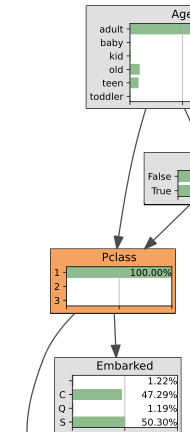

In [11]:
gnb.showInference(bn,evs={"Gender": "Female", "Pclass": "1"}, size="6") 

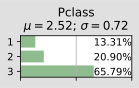

In [12]:
#Probabilidad de la clase en la que viajan los adolecentes.

gnb.showPosterior(bn,evs={ "Age": 'teen'},target='Pclass')


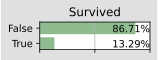

In [13]:
# Probabilidad de sobrevivencia de los Hombres adultos:

gnb.showPosterior(bn,evs={"Gender": "Male"},target='Survived')

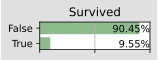

In [14]:
# Probabilidad de sobrevivencia de los adolescentes en tercera clase:

gnb.showPosterior(bn,evs={"Gender": "Male", "Age": "teen", "Pclass": "3"},target='Survived')

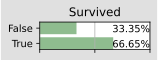

In [15]:
#Probabilidad de sobrevivencia de las mujeres en tercera clase:
gnb.showPosterior(bn,evs={"Gender": "Female", "Pclass": "3"},target='Survived')

In [16]:
gum.saveBN(bn, "RedBayesiana_titanic.bif")

# Modelo bayesiano a partir de conocimiento previo



In [17]:
# creamos el modelo donde la variable dependiente (Sobreviviencia) esta
# condicionada a las otras variables que son independientes entre ellas
bn = gum.BayesNet("Sobrevivientes")
bn =gum.fastBN("Edad{menor|adulto|mayor}->Sobrevivencia{No|Sí}<-Sexo{Mujer|Hombre};Familiares{No|Sí}->Sobrevivencia")
print(bn.variable("Sobrevivencia"))
print(bn.variable("Edad"))
print(bn.variable("Sexo"))
print(bn.variable("Familiares"))

bn

Sobrevivencia:Labelized({No|Sí})
Edad:Labelized({menor|adulto|mayor})
Sexo:Labelized({Mujer|Hombre})
Familiares:Labelized({No|Sí})


(pyAgrum.BayesNet<double>@0x2144c00) BN{nodes: 4, arcs: 3, domainSize: 24, dim: 16, mem: 248o}

In [18]:


bn.cpt('Edad').fillWith([ 0.38, 0.43, 0.19])
bn.cpt('Edad')

(pyAgrum.Potential<double>@0x147acd0) 
  Edad                       |
menor    |adulto   |mayor    |
---------|---------|---------|
 0.3800  | 0.4300  | 0.1900  |

In [19]:
bn.cpt('Sexo').fillWith( [.80, .20])
bn.cpt('Sexo')

(pyAgrum.Potential<double>@0x128cd50) 
  Sexo             |
Mujer    |Hombre   |
---------|---------|
 0.8000  | 0.2000  |

In [20]:
bn.cpt('Familiares').fillWith([ .25, .75])
bn.cpt('Familiares')

(pyAgrum.Potential<double>@0x1f091b0) 
  Familiares       |
No       |Sí      |
---------|---------|
 0.2500  | 0.7500  |

In [21]:
gnb.sideBySide(bn, gnb.getInference(bn))

G <!-- Sexo --> Sexo Sexo <!-- Sobrevivencia --> Sobrevivencia Sobrevivencia <!-- Sexo->Sobrevivencia --> Sexo->Sobrevivencia <!-- Familiares --> Familiares Familiares <!-- Familiares->Sobrevivencia --> Familiares->Sobrevivencia <!-- Edad --> Edad Edad <!-- Edad->Sobrevivencia --> Edad->Sobrevivencia


In [27]:
import pandas as pd
gum.generateSample(bn, n=1000, "sample.csv", show_progress=True,
                   with_labels=True, random_order=False) 


sample.csv: 100%|██████████████████████████████████████████|

Log2-Likelihood : -3717.567326033856


-3717.567326033856

In [26]:
pd.read_csv('sample.csv')

,Edad,Sobrevivencia,Sexo,Familiares
0,menor,Sí,Mujer,Sí
1,adulto,No,Hombre,No
2,menor,No,Mujer,Sí
3,menor,Sí,Mujer,Sí
4,menor,No,Hombre,Sí
...,...,...,...,...
995,adulto,Sí,Mujer,Sí
996,adulto,Sí,Hombre,Sí
997,mayor,Sí,Mujer,No
998,menor,Sí,Mujer,Sí
